In [96]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import fractions


# Uncomment for fractions
# np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())}) 

# Uncomment for decimals
np.set_printoptions(formatter={})

In [97]:
# Matrix X (alle Werte, ohne 1-er Spalte, ohne y-Werte)
X_u = np.array([
    [0],
    [1],
    [2]
])

# Lösungsvektor, alle y-Werte
y = np.array(
    [1, 1, 3]
)

In [98]:
# Add column of 1 for Constant
X = np.c_[X_u, np.ones(X_u.shape[0])]

# X^T*X, P & Q
print(f'X^T * X =\n{X.T@X}')
P = X@la.inv((X.T@X))@X.T
print(f'P =\n{P}')
print(f'P gerundet =\n{np.around(P, 4)}')
print(f'Q =\n{np.eye(len(X))-P}')
print(f'Q gerundet =\n{np.around(np.eye(len(X))-P, 4)}')

# Calculate b hat
b_hat = la.inv(X.T@X)@X.T@y
# Rounding
b_hat_r = np.around(b_hat, 2)

print(f'b = {b_hat_r}')
s = "y = "
for i, b in enumerate(b_hat_r):
    if i+1 != len(b_hat_r):
        s = s + f'x{i}*{b} + '
    else: 
        s = s + str(b)
print(s)

X^T * X =
[[5. 3.]
 [3. 3.]]
P =
[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]
P gerundet =
[[ 0.8333  0.3333 -0.1667]
 [ 0.3333  0.3333  0.3333]
 [-0.1667  0.3333  0.8333]]
Q =
[[ 0.16666667 -0.33333333  0.16666667]
 [-0.33333333  0.66666667 -0.33333333]
 [ 0.16666667 -0.33333333  0.16666667]]
Q gerundet =
[[ 0.1667 -0.3333  0.1667]
 [-0.3333  0.6667 -0.3333]
 [ 0.1667 -0.3333  0.1667]]
b = [1.   0.67]
y = x0*1.0 + 0.67


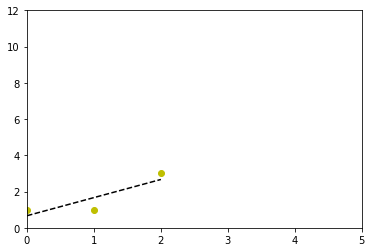

In [99]:
X_1 = X_u[:, 0]

if X_u.shape[1] == 1:
    coef = np.polyfit(X_1,y,1)
    poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

    plt.plot(X_1,y, 'yo', X_1, poly1d_fn(X_1), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

    plt.xlim(0, 5)
    plt.ylim(0, 12)